# Bernoulli Trial  

A Bernoulli trial is an experiment in which there are two possible outcomes. These outcomes are labeled as success or failure. The probability of success is p while the probabilty of failure is q. Since the probability of all outcomes must sum to one, we have $p + q = 1$.   

Some common examples are:   

- Flipping a fair coin. If we define heads as success and tails as failure, then $p = 0.5$ and tails $q = 0.5$   



- Rolling a die. If we define 3 as a success and everything else as a failure, then $p = \frac{1}{6}$ and $q = \frac{5}{6}$      


- Drawing the top card from a deck of cards. If we define an ace as a success and everything else as a failure, then $p = \frac{4}{52}$ and $q = \frac{48}{52}$   


# Binomial Distribution

The binomial distribution describes the outcome x of n Bernoulli trials. In keeping with the examples above you could ask, "if I flipped a fair coin 10 times, what is the probability that I'll get exactly 5 heads?" Here n = 10 as we are perfroming 10 Bernoulli trials and outcome of interest x = 5.

To evaluate this question analytically, you could use the following formula   

$$P(X = x) = \binom{n}{x}p^{x}q^{n-x}$$  

This says that the probability of x occuring, is equal to n choose x (the number of ways to get x outcomes in n trials; or the number of ways to get 5 heads in 10 flips) times the probability of success x times, times the probability of failure n-x times. Using this formula above we see that analytically, the probability of getting 5 heads out of 10 coin flips is   

$$
\begin{align}
P(X = 5) & = \binom{10}{5}(0.5)^5(0.5)^{10-5} \\  \\ 
         & = (252)(0.03125)(0.03125) \\  \\ 
         & = 0.2461 \\  
\end{align}
$$

Another way to figure out this probability is to start flipping a coin. You flip a coin 10 times in a row and write down how many times heads came up. This is just one experiment though, all ten trials amounts to a single data point; i.e., the number of heads you got when you flipped a coin 10 times. This is demonstrated below in code. First we learn to simulate a single coin flip. Then we flip it 10 times and observe how many heads came up out of the ten times.

In [1]:
# Using numpy to generate random numbers
import numpy as np

# np.random.rand() returns a number between 0 and 1. 
# All numbers between 0 and 1 have equal probability of being chosen.
np.random.rand()

0.5026680188886404

In [5]:
# If we define anything above 0.5 as heads and everything below 0.5 as tails, we can simulate the coin flips
if np.random.rand() > 0.5:
    print('Heads')
    
else:
    print('Tails')

Heads


In [6]:
# Using this, we can write a for loop to run a trial of 10 coin flips and record the number of heads

# At the start of the experiment, we have 0 heads
heads = 0

# start flipping 10 times
for _ in range(10):
    
    # simulate a flip
    outcome = np.random.rand()
    
    # if the coin comes up heads, increment by 1
    if outcome > 0.5:
        heads += 1
    
    # if it isn't heads, do nothing
    else:
        pass
    
# print how many heads came up out of of the 10 flips    
print(heads)

6


This doesn't say much about the probability of getting heads five times overall though. As said before, this is our single data point.   

To get a feel for the probability you have to repeat the experiment many many times. Flip a coin 10 times and record the number of heads. Then do it again 1000 times. Code is below. We just take the code we wrote above, and enclose it in a for loop that runs 1000 times. We also start a heads_list to keep track of each data point (the outcome of each of the ten flips).  

In [38]:
# initialize heads_list
heads_list = []

num_of_experiments = 1000

# Do what we did above 1000 times
for _ in range(num_of_experiments):
    
    # At the start of the experiment, we have 0 heads
    heads = 0

    # start flipping 10 times
    for _ in range(10):

        # simulate a flip
        outcome = np.random.rand()

        # if the coin comes up heads, increment by 1
        if outcome > 0.5:
            heads += 1

        # if it isn't heads, do nothing
        else:
            pass

    # record how many heads came up out of of the 10 flips    
    heads_list.append(heads)

Now we have a list of 1000 experiments. How many times did we get 5 heads out of 10 flips? We can observe this by converting our heads_list to a numpy array and making use of a boolean condition equal to 5.  

In [39]:
heads_array = np.array(heads_list) # create the array so that we can use a boolean condition

# In the array, whereever a five occurs, it will be set to True. Everything else we be set to False
# When we sum this, all Trues will evaluate to 1 and Falses will evaluate to 0. 
# True + True = 2
# True + False = 1
# False + False = 0
# etc.
head5_count = sum(heads_array == 5)
print(f'5 heads in ten flips happened {head5_count} times out of the {num_of_experiments}')
print(f'Simulated probability is {round(head5_count/num_of_experiments,4)}')

5 heads in ten flips happened 233 times out of the 1000
Simulated probability is 0.233


That's really close to the analytical solution of 0.2461. The more times you perform the experiment the closer these two solutions are to each other. You can see this by changing the variable num_of_experiments above and rerunning the cells.   

Let's look at a histogram of all the outcomes.

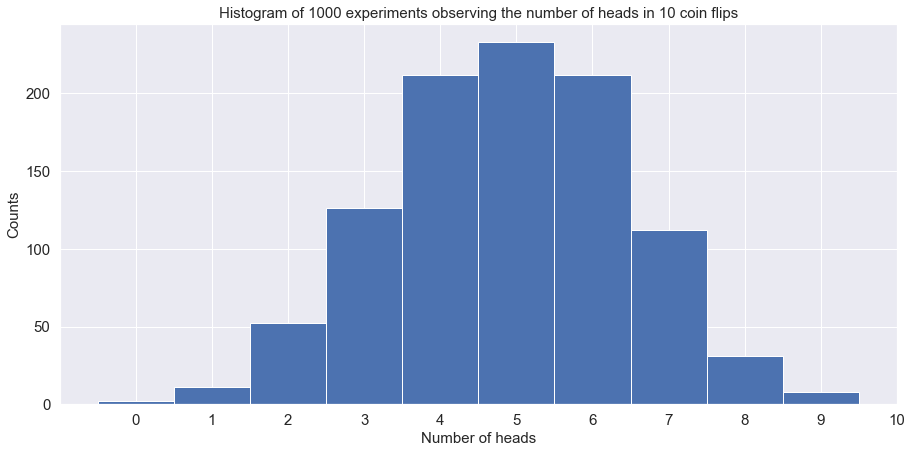

In [43]:
# Importing matplot lib for the histogram
import matplotlib.pyplot as plt

# importing seaborn for styling
import seaborn as sns
sns.set() # sets plot style


fs = 15 # fs = fontsize
plt.figure(figsize=(15,7)) # Create a figure 15 by 7
plt.title('Histogram of 1000 experiments observing the number of heads in 10 coin flips', fontsize=fs) # title
plt.hist(heads_list, bins=np.arange(0,11)-0.5); # Make histogram with bins centered on 1, 2, 3, ..., 10
plt.xticks(np.arange(0, 11), [str(x) for x in np.arange(0, 11)], fontsize=fs)
plt.xlabel('Number of heads', fontsize=fs)
plt.ylabel('Counts', fontsize=fs)
plt.yticks(fontsize=fs)
plt.show()